In [33]:
import pandas as pd
import matplotlib.pyplot as plt
# from NewsSentiment import TargetSentimentClassifier
from scipy.signal import savgol_filter


In [34]:
cur_color = "#06cc1d"
dis_color = "#399944"

In [35]:
cnn = pd.read_csv('../data/output_data/trump_cnn_news_sentiment.csv')
fox = pd.read_csv('../data/output_data/trump_fox_news_sentiment.csv')


In [36]:
def add_data_to_plot(axes, vendor1, vendor2, mean1, mean2, correlation):
    axes.text(0.02, 0.95, f'Correlation: {round(correlation,4)}',
                           fontdict={'size': 15, 'color':cur_color}, transform=axes.transAxes)
                
    axes.text(0.02, 0.92, f'Mean {vendor2}: {round(mean1,4)},',
                fontdict={'size': 10, 'color':dis_color}, transform=axes.transAxes)
    axes.text(0.02, 0.89, f'Mean {vendor1}: {round(mean2,4)}',
                fontdict={'size': 10, 'color':dis_color}, transform=axes.transAxes)
    return axes

In [37]:
cnn

,title,date,index,text,num_of_sentences,neg_lbl,pos_lbl,neu_lbl,neg_s,neu_s,pos_s,compound_s,pos,neg,neu,compound,sum_score,rolling_score_sum,rolling_num_sentences,rolling_score_by_senteces
0,Why Biden is only just about to face his first...,2023-03-03,0.0,spend some time reading about how the presiden...,2.0,1.0,0.0,0.0,0.436043,0.299039,0.078644,-0.309387,0,0,0,0,-0.618775,NaN,NaN,NaN
1,DOJ ramps up its allegations that Texas is 'ju...,2023-03-03,1.0,the justice department is tripling down on its...,7.0,0.0,0.0,1.0,0.348826,0.586998,0.064177,-0.369097,0,0,0,0,-2.583679,NaN,NaN,NaN
2,Michigan threats deepen America's dangerous ne...,2023-03-03,2.0,an alleged threat to kill jewish government le...,9.0,1.0,0.0,0.0,0.873502,0.110552,0.015946,-0.900647,0,0,0,0,-8.105822,NaN,NaN,NaN
3,Fair and Balanced? Murdoch's private messages ...,2023-03-03,3.0,"""we report. you decide."" that was the longtime...",3.0,1.0,0.0,0.0,0.572246,0.259521,0.168234,-0.498651,0,0,0,0,-1.495954,NaN,NaN,NaN
4,Jim Jordan's first FBI whistleblowers face scr...,2023-03-03,4.0,in his quest to prove the federal government h...,1.0,0.0,0.0,1.0,0.018479,0.547428,0.053496,0.078812,0,0,0,0,0.078812,-12.725418,22.0,-0.578428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,Trump rally highlighting January 6 case of all...,2022-09-05,2395.0,"rep. zoe lofgren, a member of the house panel ...",5.0,1.0,0.0,0.0,0.458434,0.429609,0.111957,-0.603257,0,0,0,0,-3.016283,-9.553445,16.0,-0.597090
2396,Opinion: Trump's incendiary rally proved Presi...,2022-09-05,2396.0,former president donald trump gave his first p...,21.0,1.0,0.0,0.0,0.637257,0.294950,0.067793,-0.698628,0,0,0,0,-14.671189,-18.224635,31.0,-0.587891
2397,Biden's use of Marines during Philadelphia spe...,2022-09-04,2397.0,as president joe biden stood outside philadelp...,9.0,1.0,0.0,0.0,0.498046,0.321228,0.180727,-0.348238,0,0,0,0,-3.134146,-20.795288,39.0,-0.533213
2398,Raskin says January 6 committee will release i...,2022-09-04,2398.0,a democratic member of the house select commit...,5.0,1.0,0.0,0.0,0.845922,0.138632,0.015446,-0.997806,0,0,0,0,-4.989030,-25.168376,43.0,-0.585311


In [38]:
worst_precentile = cnn.compound_s.quantile(0.1)
best_precentile = cnn.compound_s.quantile(0.9)
print("worst_precentile (10%): ", worst_precentile, ". best_precentile (10%): ", best_precentile)

best_precentile = cnn.compound_s.quantile(0.95)
print("best_precentile (5%): ", best_precentile)

cnn[cnn.compound_s < worst_precentile].loc[:, ('title', 'compound_s')].values

worst_precentile (10%):  -0.9270208030342544 . best_precentile (10%):  0.30127017298865966
best_precentile (5%):  0.6163706051312868


array([['Colorado discipline office moves toward ethics complaint against ex-Trump attorney for 2020 election gambits',
        -0.9999999679806376],
       ['Paul Ryan grilled for remaining on Fox board of directors amid election fraud revelations',
        -1.0],
       ["Fox executives should be fired for 'proven misconduct' exposed in Dominion lawsuit, renowned Yale professor says",
        -1.0],
       ["Fox faces an 'existential threat' from its multibillion-dollar defamation cases",
        -0.9999952319679636],
       ["Opinion: Tim Scott's pitch to Republicans offers more than the usual red meat",
        -0.9530211889494016],
       ['Media organizations ask Congress for access to January 6 footage',
        -0.9705882352941176],
       ['Judge tosses out disciplinary action against Sidney Powell for work on Trump election reversal bid',
        -0.9968102449436784],
       ['Federal prosecutors seek to compel Pence to testify in special counsel probe',
        -0.9999999999

In [39]:
cnn[cnn.compound_s > best_precentile].loc[:, ('title', 'compound_s')].values

array([['White House releases ambitious cyber strategy calling for more regulation of vulnerable sectors',
        0.8771875345562102],
       ["Opinion: Who's stopping the government from giving Americans relief from crushing student loans",
        0.6485590542192611],
       ['The fastest growing metro in the US is looking to a shrinking reservoir to keep the boom going',
        0.6584496118870106],
       ['Rep. Elissa Slotkin entering race to succeed retiring Michigan Democratic Sen. Debbie Stabenow',
        0.9619421447498048],
       ["Buttigieg says he'll visit East Palestine 'when the time is right,' lays out new rail safety efforts",
        0.9510170803680182],
       ["Opinion: Pence's plan for a 'better deal' on Social Security should be a non-starter",
        0.7439716220517077],
       ['Adam Frisch announces 2024 campaign after losing to Rep. Lauren Boebert in one of the closest races in 2022',
        0.8611819233070853],
       ['A subsidy arms race is kicking off 

In [40]:
cnn.head(3)


,title,date,index,text,num_of_sentences,neg_lbl,pos_lbl,neu_lbl,neg_s,neu_s,pos_s,compound_s,pos,neg,neu,compound,sum_score,rolling_score_sum,rolling_num_sentences,rolling_score_by_senteces
0,Why Biden is only just about to face his first...,2023-03-03,0.0,spend some time reading about how the presiden...,2.0,1.0,0.0,0.0,0.436043,0.299039,0.078644,-0.309387,0,0,0,0,-0.618775,NaN,NaN,NaN
1,DOJ ramps up its allegations that Texas is 'ju...,2023-03-03,1.0,the justice department is tripling down on its...,7.0,0.0,0.0,1.0,0.348826,0.586998,0.064177,-0.369097,0,0,0,0,-2.583679,NaN,NaN,NaN
2,Michigan threats deepen America's dangerous ne...,2023-03-03,2.0,an alleged threat to kill jewish government le...,9.0,1.0,0.0,0.0,0.873502,0.110552,0.015946,-0.900647,0,0,0,0,-8.105822,NaN,NaN,NaN


In [41]:
def date_from_recet_only(df):
    df.date = [pd.to_datetime(date).strftime("%Y-%m-%d") for date in df.date]
    df = df[df['date'] > '2022-11-01']
    df = df.sort_values(by='date')
    return df

# cnn = date_from_recet_only(cnn)
# fox = date_from_recet_only(fox)

In [42]:
def add_week_month(df:pd.DataFrame):
    df['date'] = pd.to_datetime(df['date'])
    df['week'] = df['date'].dt.year.astype(str) + '-'  + df['date'].dt.week.astype(str) 
    df['month'] = df['date'].dt.year.astype(str) + '-' + df['date'].dt.month.astype(str) 
    return df

cnn = add_week_month(cnn)
fox = add_week_month(fox)


/tmp/ipykernel_1004/1222786786.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df['date'].dt.year.astype(str) + '-'  + df['date'].dt.week.astype(str)
/tmp/ipykernel_1004/1222786786.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df['date'].dt.year.astype(str) + '-'  + df['date'].dt.week.astype(str)


In [48]:

def monthly_avg_plot(df1:pd.DataFrame, vendor1, color='#4287f5', df2:pd.DataFrame = None, vendor2=None, color2='#f56342'):
            
            df1['date'] = pd.to_datetime(df1['date'])
            df1 = df1.sort_values(by=['month'], ascending=True)
            df1 = df1.groupby('month').median().rename(columns={'compound_s': vendor1})
            axes = df1.plot(y=vendor1, kind='line',
                             title=f'{vendor1} and {vendor2} News Sentiment', color=color , figsize=(17,8))
            if (df2 is not None):
                df2['date'] = pd.to_datetime(df2['date'])
                df2 = df2.sort_values(by=['month'], ascending=True)
                df2 = df2.groupby('month').median().rename(columns={'compound_s': vendor2})
                correlation = df2[vendor2].corr(df1[vendor1])
                mean1 = df1[vendor1].mean()
                mean2 = df2[vendor2].mean()

                df2.plot(y=vendor2, kind='line', ax=axes, color=color2)
                add_data_to_plot(axes, vendor1, vendor2, mean1, mean2, correlation)

            pd.DataFrame({'month': df1.index, 'baseline': [0.0]*len(df1)}).plot(
                    x='month', y='baseline', kind='line', ax=axes, color='#40464f', linestyle='--')

def weekly_avg_plot(df1:pd.DataFrame, vendor1, color='#4287f5', df2:pd.DataFrame = None, vendor2=None, color2='#f56342'):       
                df1['date'] = pd.to_datetime(df1['date'])
                df1 = df1.sort_values(by=['week'], ascending=True)
                df1 = df1.groupby('week').median().rename(columns={'compound_s': vendor1})
                title = f'{vendor1}'
                axes = df1.plot(y=vendor1, kind='line', title=f'{vendor1} and {vendor2} News Sentiment', color=color , figsize=(17,8))

                if (df2 is not None):
                    df2['date'] = pd.to_datetime(df2['date'])
                    df2 = df2.sort_values(by=['week'], ascending=True)
                    df2 = df2.groupby('week').median().rename(columns={'compound_s': vendor2})
                    correlation = df2[vendor2].corr(df1[vendor1])
                    mean1 = df1[vendor1].mean()
                    mean2 = df2[vendor2].mean()
                    add_data_to_plot(axes, vendor1, vendor2, mean1, mean2, correlation)
                    title += f' and {vendor2}'

                    df2.plot(y=vendor2, kind='line', ax=axes, color=color2)
                    
                title += ' News Sentiment'
                pd.DataFrame({'week': df1.index, 'baseline': [0.0]*len(df1)}).plot(x='week', y='baseline', kind='line', ax=axes, color='#40464f', linestyle='--')
    


weekly_avg_plot(cnn, 'CNN')
weekly_avg_plot(fox, 'Fox', color='#f56342')
# weekly_avg_plot(cnn, 'CNN', df2=fox, vendor2='Fox', color2='#f56342')
monthly_avg_plot(fox, 'Fox', color='#f56342')
monthly_avg_plot(cnn, 'CNN')
# monthly_avg_plot(cnn, 'CNN', df2=fox, vendor2='Fox', color2='#f56342')



IndentationError: unexpected indent (573450902.py, line 40)

In [44]:
cnn.columns

Index(['title', 'date', 'index', 'text', 'num_of_sentences', 'neg_lbl',
       'pos_lbl', 'neu_lbl', 'neg_s', 'neu_s', 'pos_s', 'compound_s', 'pos',
       'neg', 'neu', 'compound', 'sum_score', 'rolling_score_sum',
       'rolling_num_sentences', 'rolling_score_by_senteces', 'week', 'month'],
      dtype='object')

In [45]:
fox.iloc[fox.compound_s.argmin()]['title']

"'Hang Mike Pence' trends on Twitter after platform suspends Trump ..."

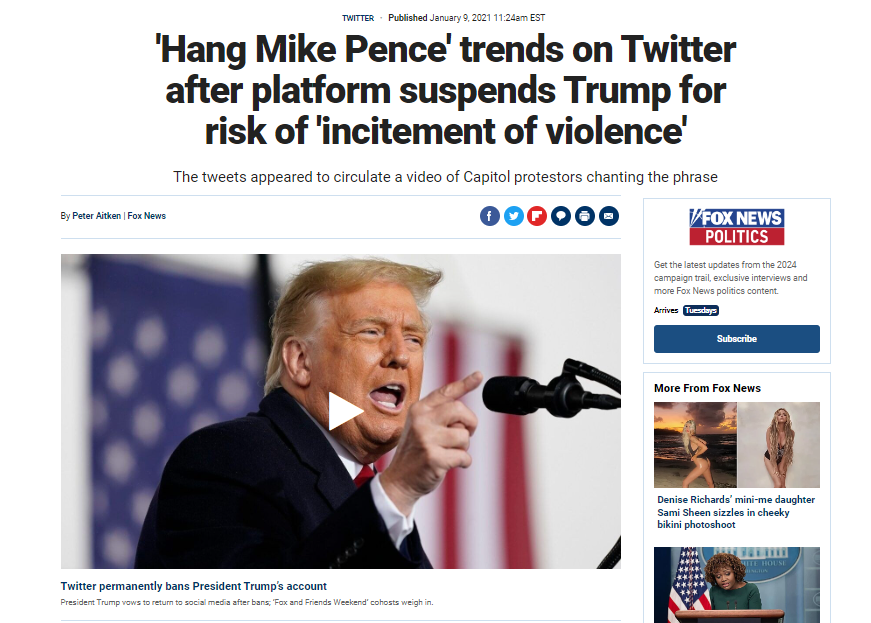

/tmp/ipykernel_1004/716468951.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('month').mean()
/tmp/ipykernel_1004/716468951.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('month').mean()


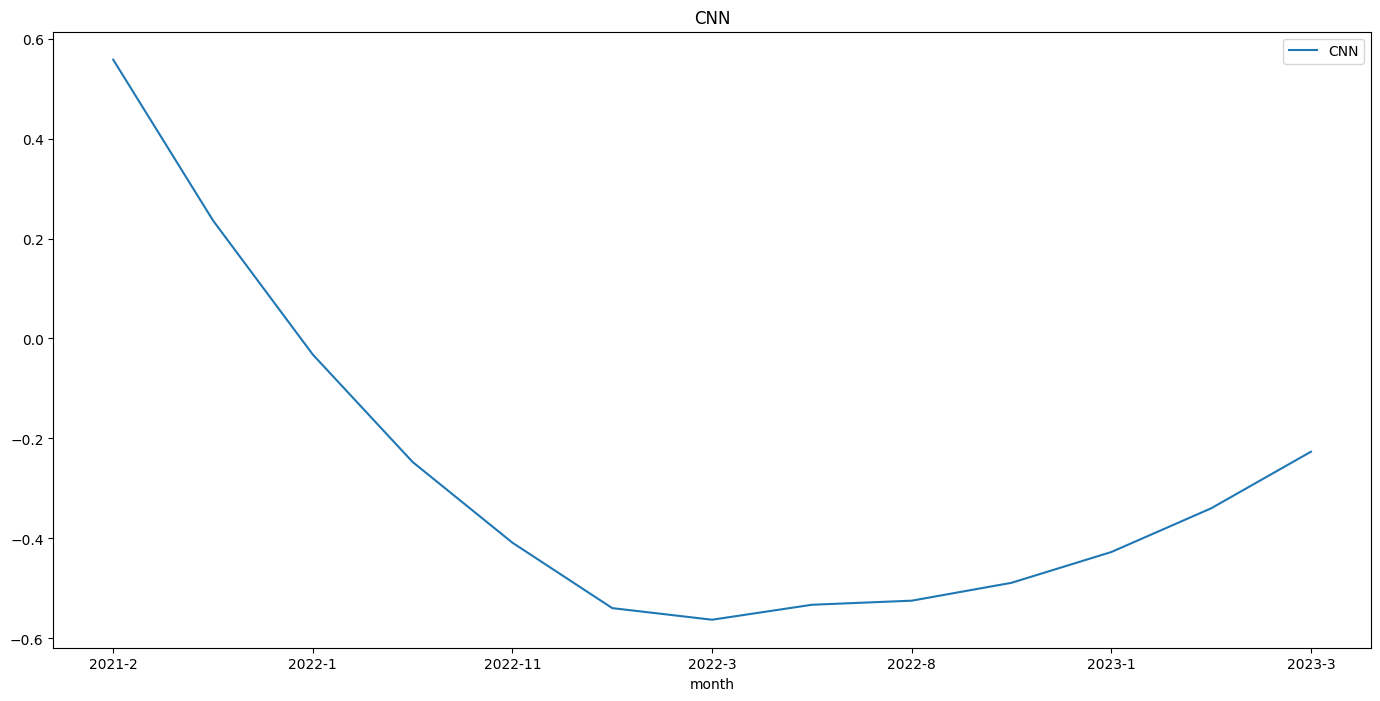

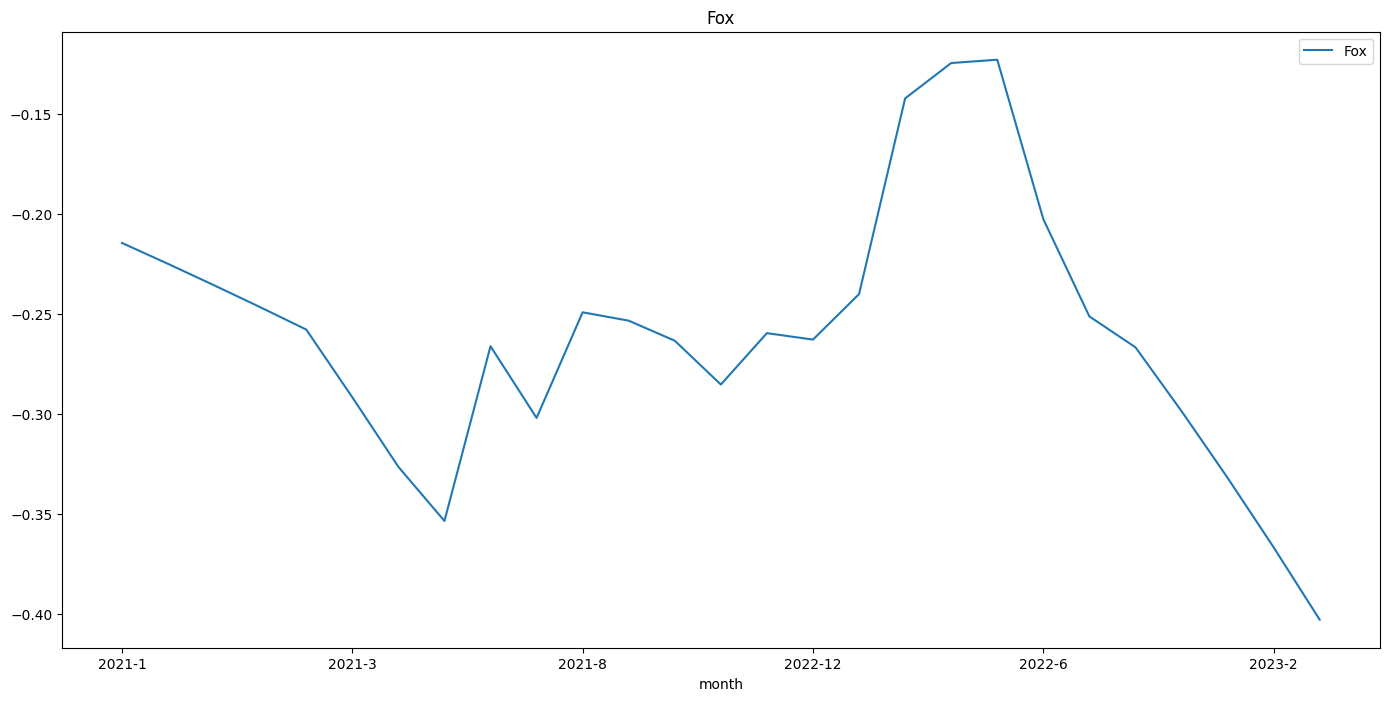

In [46]:
def plot_smooth(df:pd.DataFrame, vendor):
    df = df.sort_values(by=['date'])
    df = df.groupby('month').mean()
    df[vendor] = savgol_filter(df['compound_s'], 10, 2)
    axes = df.plot(y=vendor, kind='line', title=f'{vendor}' , figsize=(17,8))



plot_smooth(cnn, 'CNN')
plot_smooth(fox, 'Fox')

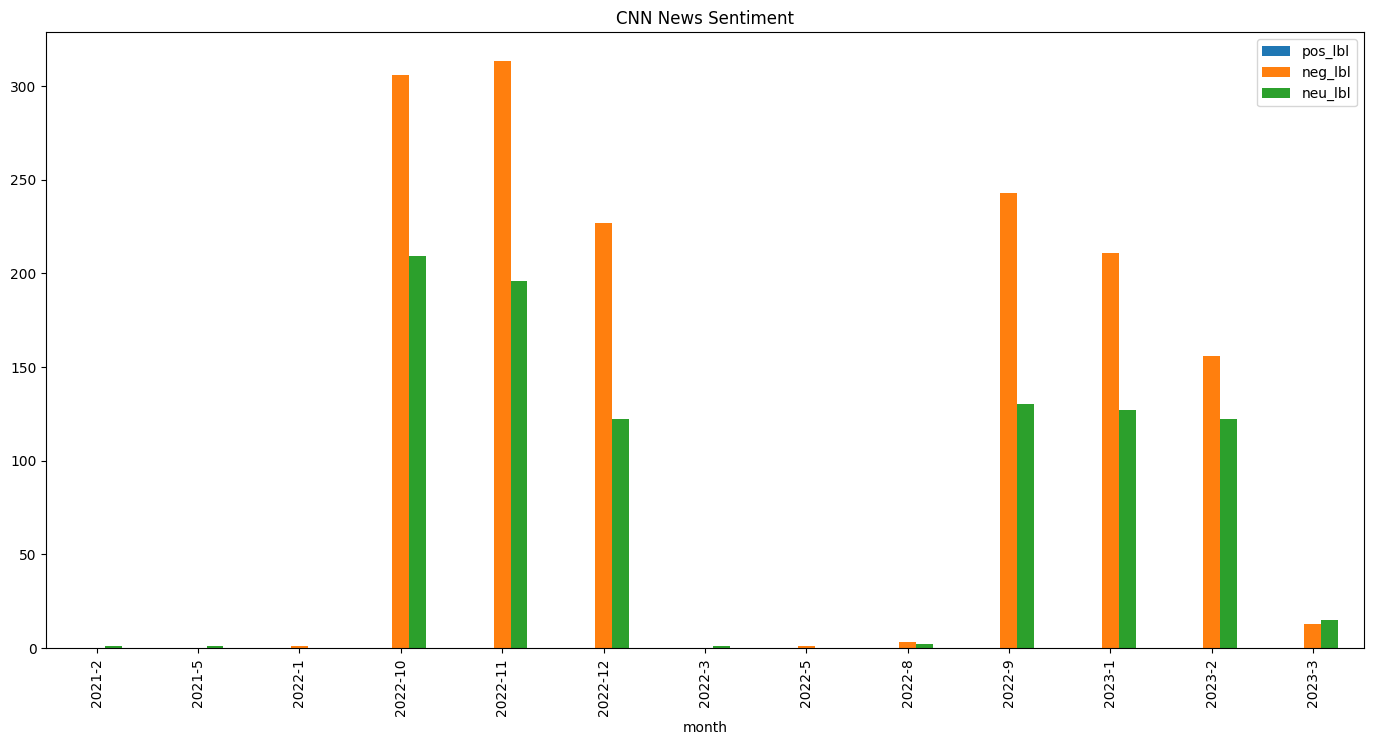

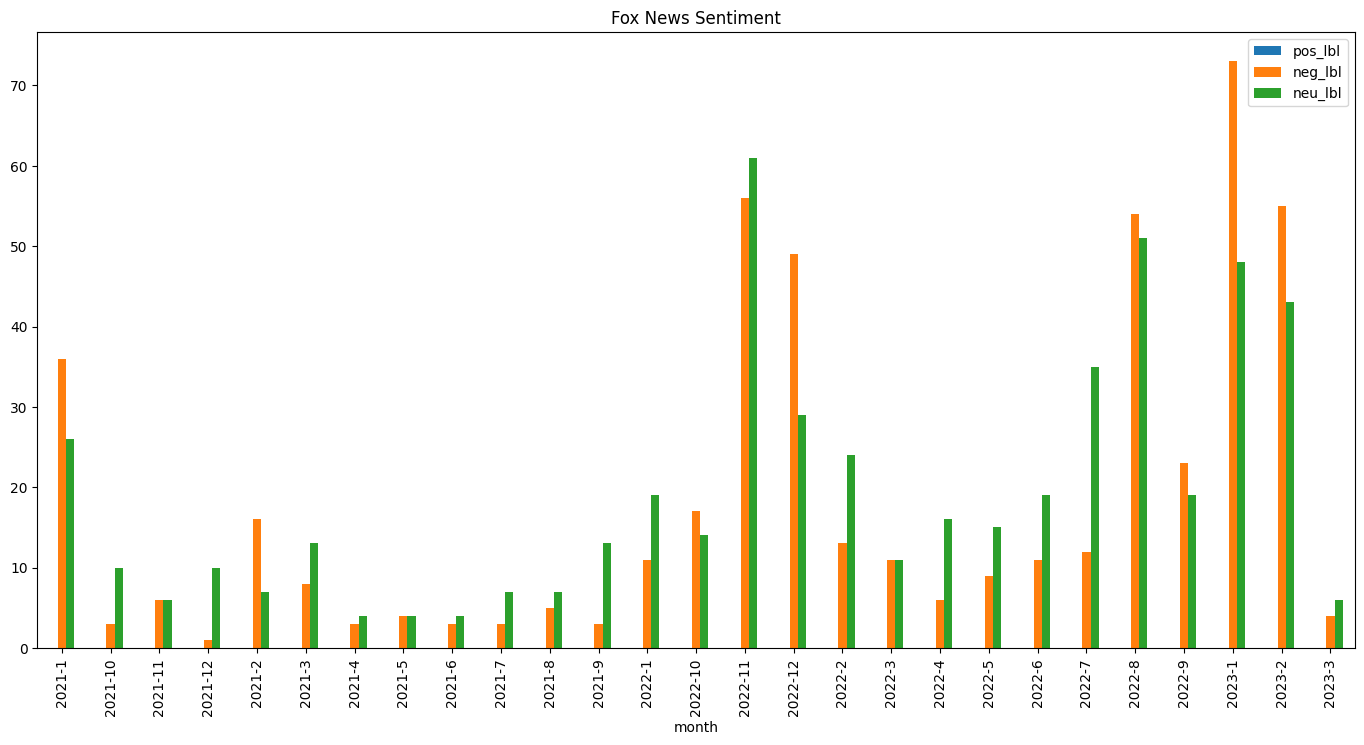

In [47]:
# def add_month(row):
#     row['month'] = row['date'].split('-')[0] + '-' + row['date'].split('-')[1]
#     return row

# cnn = cnn.apply(add_month, axis=1)

def plot_counts(df:pd.DataFrame, vendor):
    df = df.sort_values(by=['month'])
    df.groupby('month').agg({'pos_lbl':'sum', 'neg_lbl':'sum', 'neu_lbl':'sum'}).plot(kind='bar', title=f'{vendor} News Sentiment', figsize=(17,8))

plot_counts(cnn, 'CNN')
plot_counts(fox, 'Fox')
# cnn

In [71]:
fox[cnn.month == '2021-12']

,Negative,Neutral,Positive,compound,compound_s,date,index,label,neg,neg_s,neu,neu_s,pos,pos_s,title,month
92,0.0,1,0.0,0,0.298789,2022-12-06 18:11:00,92.0,Neutral,0,0.162738,0,0.481707,0,0.355554,Larry Kudlow: Former Israel Prime Minister Ben...,2022-12
93,0.0,1,0.0,0,0.482590,2022-12-21 20:34:00,93.0,Neutral,0,0.117818,0,0.497002,0,0.385180,Incoming Israeli Prime Minister Netanyahu says...,2022-12
94,0.0,1,0.0,0,0.080647,2022-11-30 12:00:00,94.0,Neutral,0,0.179170,0,0.634679,0,0.186151,Netanyahu: Iran nuclear deal is 'probably dead...,2022-11
95,0.0,1,0.0,0,-0.129687,2022-12-04 15:14:00,95.0,Neutral,0,0.299839,0,0.526410,0,0.173750,Netanyahu insists he won't step on 'landmine' ...,2022-12
